In [1]:
#Importamos las bibliotecas que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import normalize

data = pd.read_csv('data/dataset_turnos.csv')
data = data.drop(['Unnamed: 0','preciptype'], axis=1)
data.sample(3)



,appointmentfromtime,DayName,priordayholiday,nextdayholiday,day,hour,outofschedule,appointmentstate,age,daysbeforereserved,...,precipprob,precipcover,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,conditions,llovio
15911,16/3/2022 14:20,Wednesday,0,0,16,14,1,1,4,0,...,0.0,0.0,53.6,38.9,1012.0,8.4,257.2,7,Partially cloudy,0
13266,13/1/2022 11:00,Thursday,0,0,13,11,0,0,3,12,...,0.0,0.0,57.2,35.3,1011.5,10.0,381.8,9,Clear,0
15485,9/3/2022 10:00,Wednesday,0,0,9,10,0,0,10,13,...,0.0,0.0,50.0,31.5,1013.7,9.8,245.1,7,Partially cloudy,0


In [2]:
data.describe()

,priordayholiday,nextdayholiday,day,hour,outofschedule,appointmentstate,age,daysbeforereserved,firsttime,emailvalid,...,precip,precipprob,precipcover,windgust,windspeed,sealevelpressure,visibility,solarradiation,uvindex,llovio
count,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,...,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000
mean,0.000615,0.039811,15.471868,13.809504,0.240993,0.597258,6.238156,14.900047,0.409504,0.677967,...,2.275631,23.820331,2.185781,22.995050,27.011967,1016.083149,8.900118,192.890624,6.359291,0.238203
std,0.024785,0.195519,8.722967,2.996392,0.427696,0.490461,4.833163,15.161093,0.491754,0.467267,...,7.186207,42.599422,6.753452,24.871898,7.977934,5.693120,1.586790,104.395328,2.431751,0.425994
min,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.400000,999.100000,1.900000,12.600000,1.000000,0.000000
25%,0.000000,0.000000,8.000000,11.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,22.300000,1012.000000,8.400000,102.750000,4.000000,0.000000
50%,0.000000,0.000000,15.000000,14.000000,0.000000,1.000000,5.000000,12.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,25.900000,1016.300000,9.700000,171.500000,6.000000,0.000000
75%,0.000000,0.000000,23.000000,17.000000,0.000000,1.000000,10.000000,24.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,47.200000,31.700000,1020.200000,10.000000,285.600000,8.000000,0.000000
max,1.000000,1.000000,31.000000,19.000000,1.000000,1.000000,18.000000,180.000000,1.000000,1.000000,...,52.000000,100.000000,91.670000,83.500000,61.200000,1030.600000,10.900000,420.200000,10.000000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21150 entries, 0 to 21149
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appointmentfromtime  21150 non-null  object 
 1   DayName              21150 non-null  object 
 2   priordayholiday      21150 non-null  int64  
 3   nextdayholiday       21150 non-null  int64  
 4   day                  21150 non-null  int64  
 5   hour                 21150 non-null  int64  
 6   outofschedule        21150 non-null  int64  
 7   appointmentstate     21150 non-null  int64  
 8   age                  21150 non-null  int64  
 9   daysbeforereserved   21150 non-null  int64  
 10  gender               21150 non-null  object 
 11  healthcoverage       21150 non-null  object 
 12  firsttime            21150 non-null  int64  
 13  emailvalid           21150 non-null  int64  
 14  endofmonth           21150 non-null  int64  
 15  tempmax              21150 non-null 

### Vemos si el dataset se encuentra balanceado

In [4]:
data['appointmentstate'].value_counts(normalize=True)

1    0.597258
0    0.402742
Name: appointmentstate, dtype: float64

In [5]:
data_dummies=pd.get_dummies(data[['DayName','gender','healthcoverage','conditions']], drop_first = True)
data_dummies

,DayName_Monday,DayName_Thursday,DayName_Tuesday,DayName_Wednesday,gender_M,healthcoverage_Sin OS,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21145,1,0,0,0,0,0,0,1,0,0
21146,1,0,0,0,1,0,0,1,0,0
21147,1,0,0,0,1,0,0,1,0,0
21148,1,0,0,0,1,0,0,1,0,0


In [6]:
data_modelo = pd.concat([data.select_dtypes(['int64','float64']),data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)
data_modelo.head(3)



,priordayholiday,nextdayholiday,day,hour,outofschedule,appointmentstate,age,daysbeforereserved,firsttime,emailvalid,...,DayName_Monday,DayName_Thursday,DayName_Tuesday,DayName_Wednesday,gender_M,healthcoverage_Sin OS,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,0,0,4,8,0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,4,8,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,4,9,0,1,1,18,1,0,...,1,0,0,0,1,0,1,0,0,0


<AxesSubplot:>

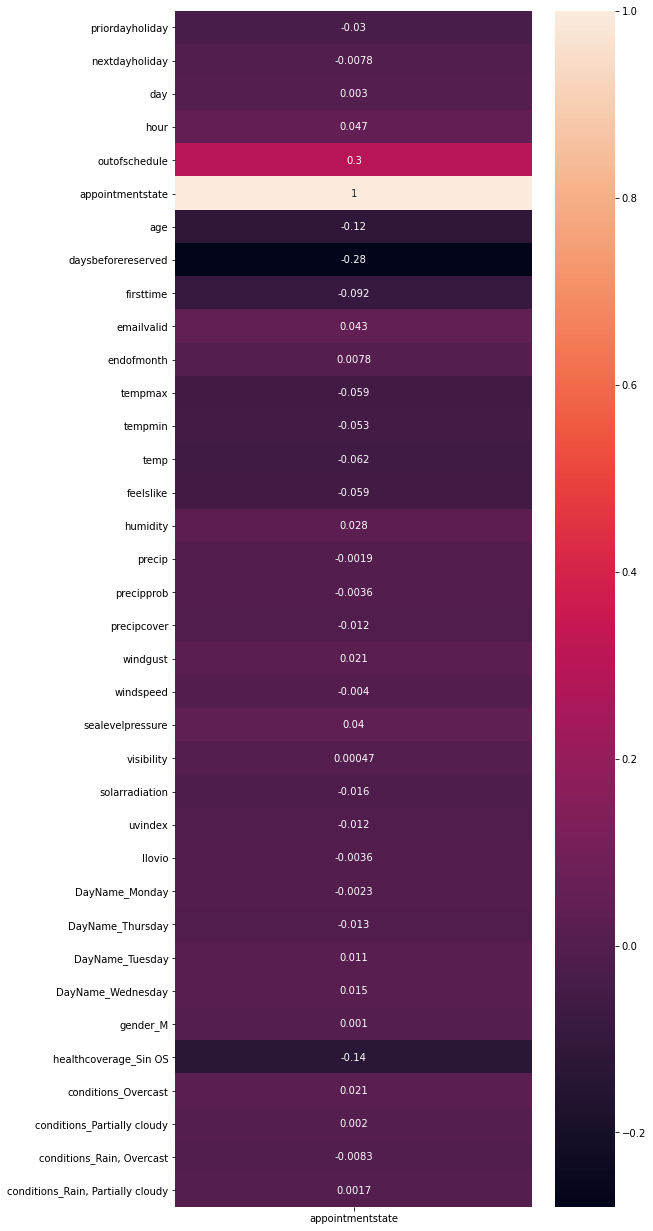

In [7]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
plt.figure(figsize=(8,22))
sns.heatmap(data_modelo.corr()[['appointmentstate']], annot=True)

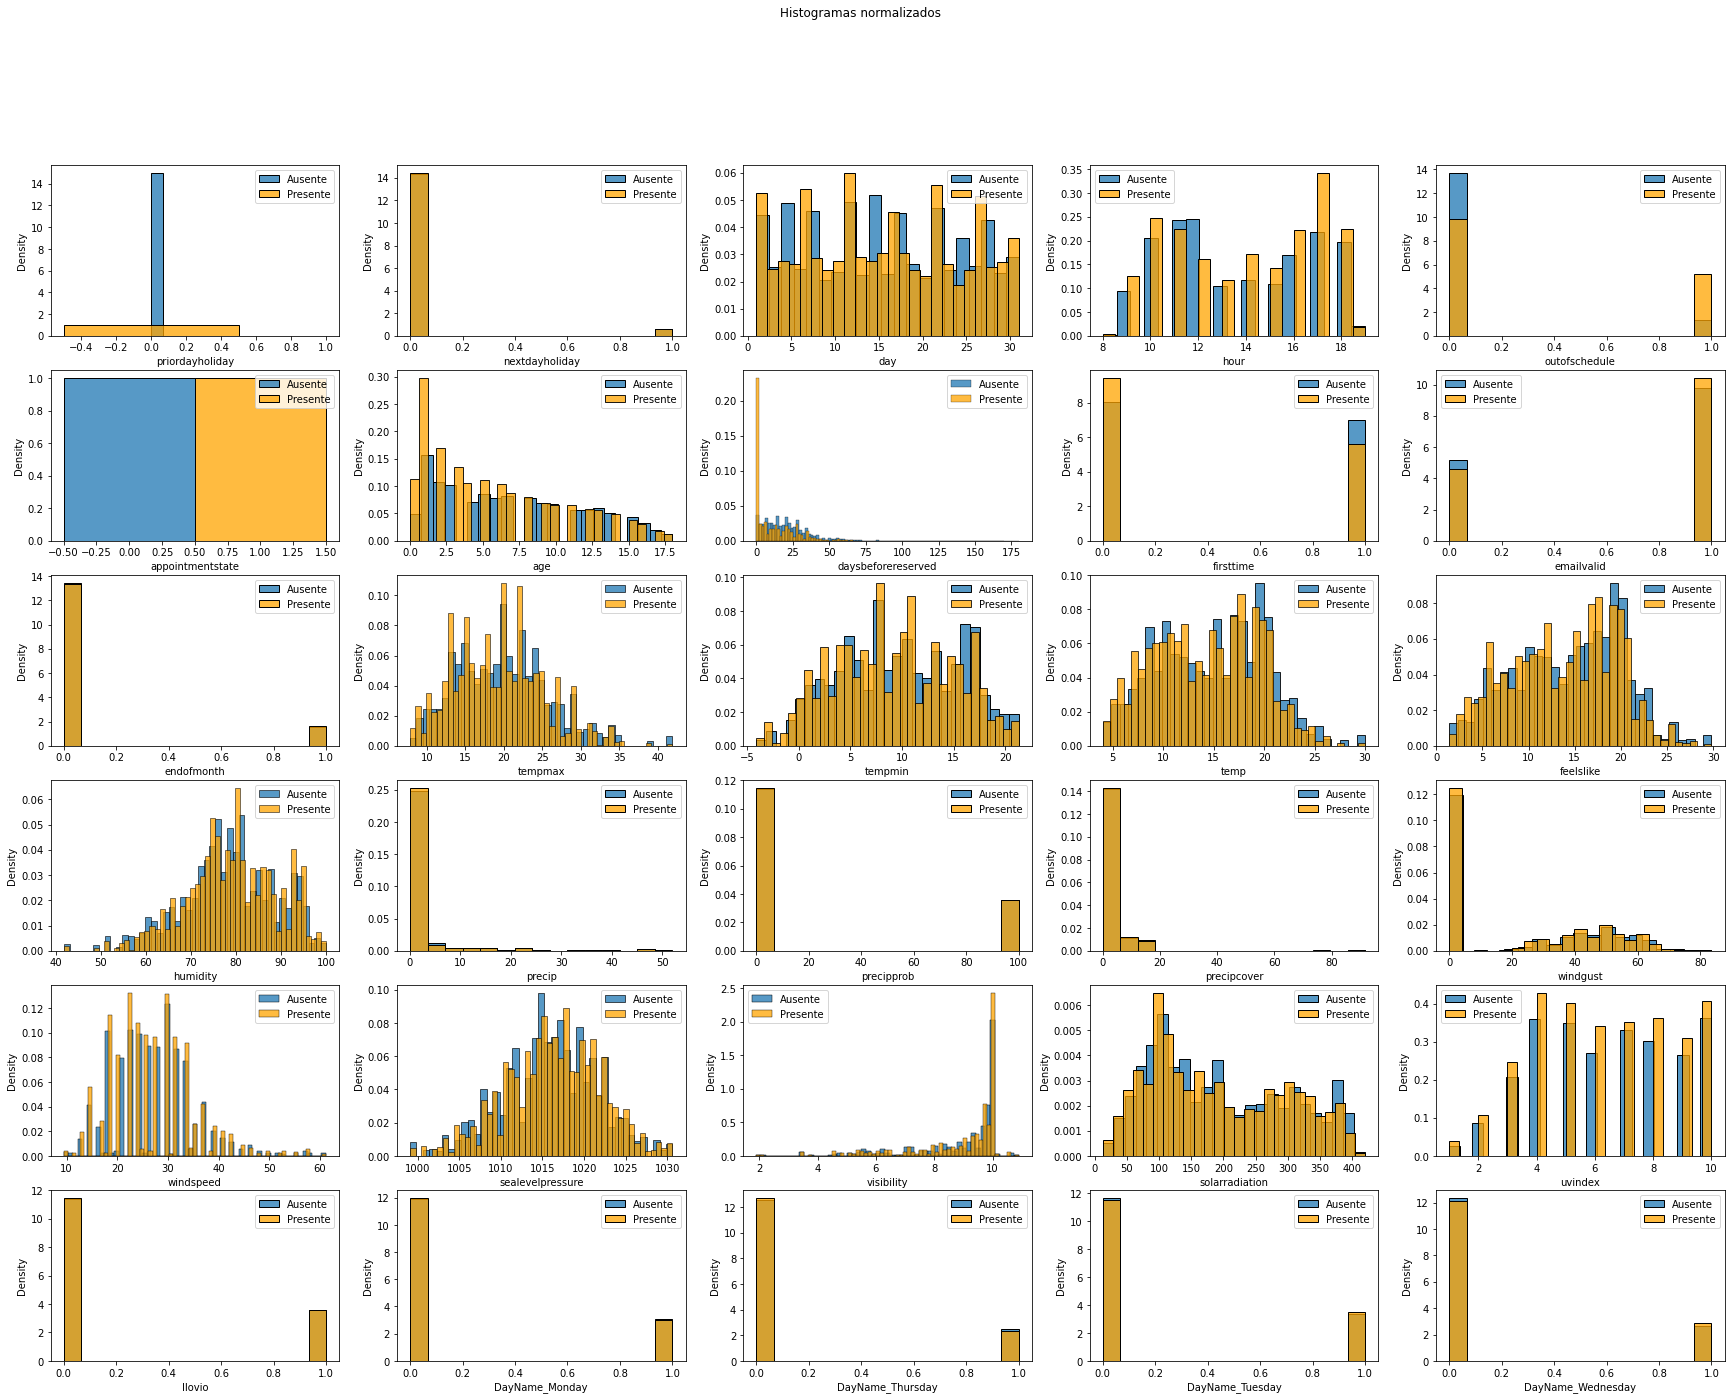

In [8]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(30,22))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(data_modelo.columns[:-1], axes.flatten()):
    sns.histplot(data = data_modelo.loc[data_modelo['appointmentstate']==0, c].dropna(), stat = 'density', ax = ax, kde = False )
    sns.histplot(data = data_modelo.loc[data_modelo['appointmentstate']==1, c].dropna(), stat = 'density', kde=False, ax=ax, color = 'orange')
    ax.legend(['Ausente', 'Presente'])

In [9]:
#Genero mi variable X
X=data_modelo.drop(['appointmentstate'],axis=1)

#Genero la variable y
y = data_modelo['appointmentstate'].squeeze()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 30)

In [10]:

def getmetrics(conf_mat):
    return conf_mat[1,1],conf_mat[0,0],conf_mat[0,1],conf_mat[1,0]

def printscores(test,predict):
    TP,TN,FP,FN = getmetrics(confusion_matrix(test, predict))    
    print('Accuracy = ', accuracy_score(test, predict))
    print('Recall = ', recall_score(test, predict))
    print('Precision = ', precision_score(test, predict))
    print('F1 = ', f1_score(test, predict))
    print('Specificity = ', TN / (TN + FP))

## Naive Bayes

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [12]:
Y_pred_gnb = gnb.predict(X_test)

In [13]:
printscores(y_test, Y_pred_gnb)

Accuracy =  0.6164901664145235
Recall =  0.9588347055098163
Precision =  0.6146975233455136
F1 =  0.7491340920336467
Specificity =  0.10892018779342723


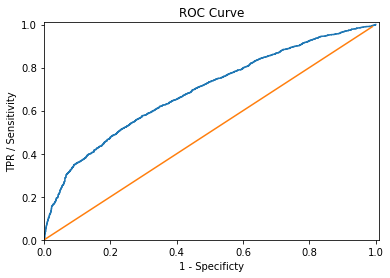

In [14]:
probs = gnb.predict_proba(X_test)
fpr,tpr,_ = roc_curve(y_test, probs[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [15]:
auc(fpr,tpr)

0.6903630246753903

Text(33.0, 0.5, 'Reales')

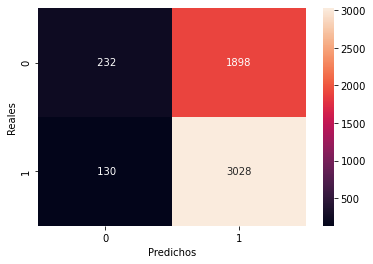

In [16]:
sns.heatmap(confusion_matrix(y_test, Y_pred_gnb), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [17]:
probs_1 = probs[:,1]
y_pred_2 = probs_1 > 0.95

In [18]:
printscores(y_test, y_pred_2)

Accuracy =  0.6242435703479576
Recall =  0.5664977834072198
Precision =  0.7432488574989614
F1 =  0.6429469901168015
Specificity =  0.7098591549295775


Text(33.0, 0.5, 'Reales')

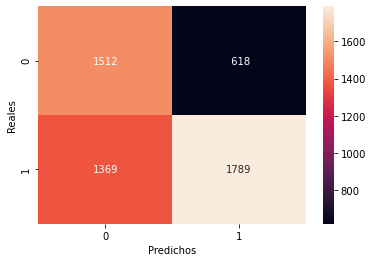

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

## GRID SEARCH 

In [20]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [21]:
models = [LogisticRegression(),
          KNeighborsClassifier()]

params = [
    {},
    {'n_neighbors': range(1,25)}
]



In [22]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5, random_state=30, shuffle=True)

In [23]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4, param_grid={},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 25)}, scoring='accuracy')


In [24]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.657041899475755
LogisticRegression()
{}
0.6439283575279917
KNeighborsClassifier(n_neighbors=15)
{'n_neighbors': 15}


In [25]:
X_test = scaler.transform(X_test)
y_preds_log = grids[0].predict(X_test)
y_preds_knn = grids[1].predict(X_test)

probs_log = grids[0].predict_proba(X_test)
probs_knn = grids[1].predict_proba(X_test)



In [26]:
print (classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

           0       0.60      0.45      0.52      2130
           1       0.68      0.79      0.73      3158

    accuracy                           0.66      5288
   macro avg       0.64      0.62      0.63      5288
weighted avg       0.65      0.66      0.65      5288



In [27]:
printscores(y_test, y_preds_log)

Accuracy =  0.6571482602118003
Recall =  0.7948068397720076
Precision =  0.6829931972789116
F1 =  0.7346699839016538
Specificity =  0.45305164319248825


Text(33.0, 0.5, 'Reales')

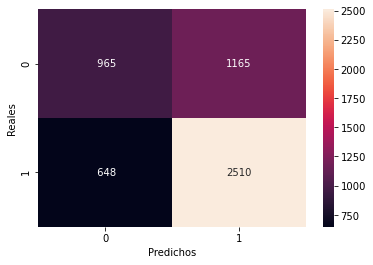

In [28]:
sns.heatmap(confusion_matrix(y_test, y_preds_log), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [29]:
printscores(y_test, y_preds_knn)

Accuracy =  0.6533661119515886
Recall =  0.7916402786573781
Precision =  0.6802721088435374
F1 =  0.7317430118542367
Specificity =  0.44835680751173707


Text(33.0, 0.5, 'Reales')

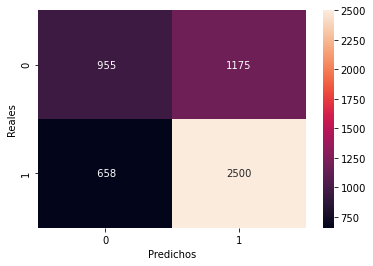

In [30]:
sns.heatmap(confusion_matrix(y_test, y_preds_knn), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

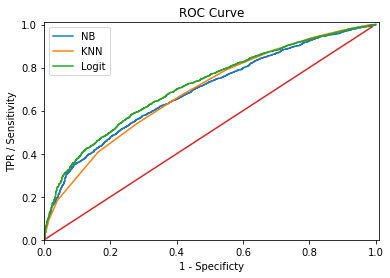

In [33]:
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, probs[:,1])
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, probs_knn[:,1])
fpr_log,tpr_log,thr_log = roc_curve(y_test, probs_log[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_knn,tpr_knn)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','KNN','Logit'])
plt.show()

In [32]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-KNN=', auc(fpr_knn, tpr_knn))
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-NB= 0.6903630246753903
AUC-KNN= 0.687804056766183
AUC-Logit= 0.7137323943661972


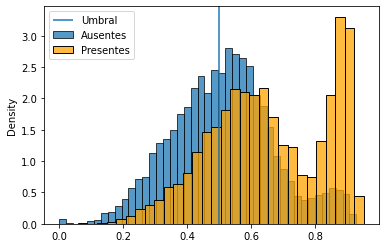

In [36]:
# Histograma de probabilidades
sns.histplot(data = grids[0].predict_proba(X_train[y_train==0])[:,1], stat = 'density')
sns.histplot(data = grids[0].predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'Ausentes', 'Presentes'])

In [46]:
y_pred_train_065 = grids[0].predict_proba(X_test)[:,1] > 0.71

In [47]:
printscores(y_test, y_pred_train_065)

Accuracy =  0.5919062027231468
Recall =  0.389803673210893
Precision =  0.8419972640218878
F1 =  0.532900432900433
Specificity =  0.8915492957746479


Text(33.0, 0.5, 'Reales')

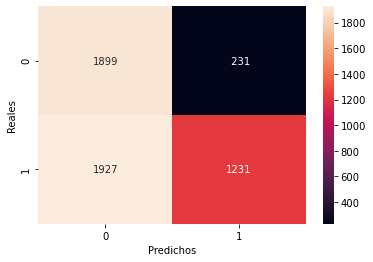

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred_train_065), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')